Ejercicio 1: Utiliza un grupo de datos de ventas mensuales para predecir las ventas del siguiente mes en funcion de variables como el mes, el año y los tipos de productos vendidos.
- Carga un CSV (HISTORICO DE VENTAS)
- Ajustar los datos en los valores faltantes y convertir fechas
- Crear un modelo de regresion lineal para predecir las ventas mensuales
- Evaluar la precision del modelo y realizar una prediccion para proximo mes

<ipython-input-32-d15d52436a07>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2022-01-01', end='2023-12-01', freq='M') #generar fechas mensuales #MS = semestral
<ipython-input-32-d15d52436a07>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_test.index, y_pred,'r--',color='red', label='Predicciones') #'r--' R:color de linea, --:tipo de linea


Error cuadratico medio: 167321264.1464329


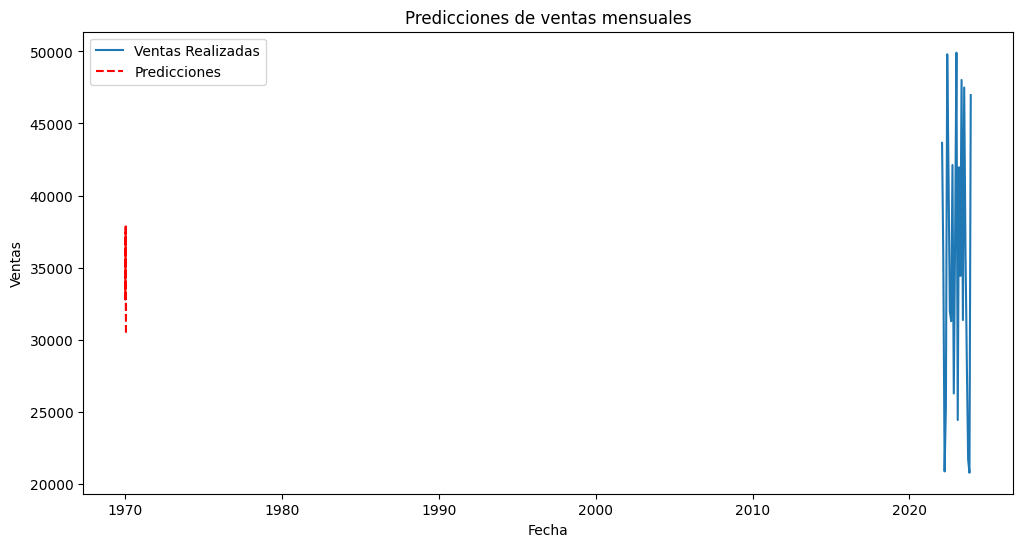

In [ ]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm #LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#generar los datos ficticios de las ventas mensuales
np.random.seed(42) #establecer la semilla aleatoria de datos fijos
fechas = pd.date_range(start='2022-01-01', end='2023-12-01', freq='M') #generar fechas mensuales #MS = semestral
ventas = np.random.randint(20000, 50000, size=len(fechas)) #generar ventas mensuales aleatorias
data = pd.DataFrame({'Fecha': fechas, 'Ventas': ventas}) #crear un dataframe con las fechas y ventas
data['Año'] = data['Fecha'].dt.year #extraer el año de la fecha
data['Mes'] = data['Fecha'].dt.month #extraer el mes de la fecha
#declarar la variable independiente y dependiente
X = data[['Año', 'Mes']]
y = data['Ventas']
#dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#crear y entrenar el modelo de regresion lineal
model = lm.LinearRegression() #model = LinearRegression()
model.fit(X_train, y_train)
#realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
#evaluar el rendimiento del modelo
evaluar = mean_squared_error(y_test, y_pred)
print('Error cuadratico medio:', evaluar)
#realizar la grafica de los resultados
plt.figure(figsize=(12, 6))
plt.plot(data['Fecha'],data['Ventas'], label='Ventas Realizadas')
plt.plot(X_test.index, y_pred,'r--',color='red', label='Predicciones') #'r--' R:color de linea, --:tipo de linea
'''
fechas_test = data.loc[X_test.index, 'Fecha']
plt.plot(fechas_test, y_pred, 'r--', label='Predicciones')
'''
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones de ventas mensuales')
plt.legend()
plt.show()


Error cuadratico medio: 7902562.312858937


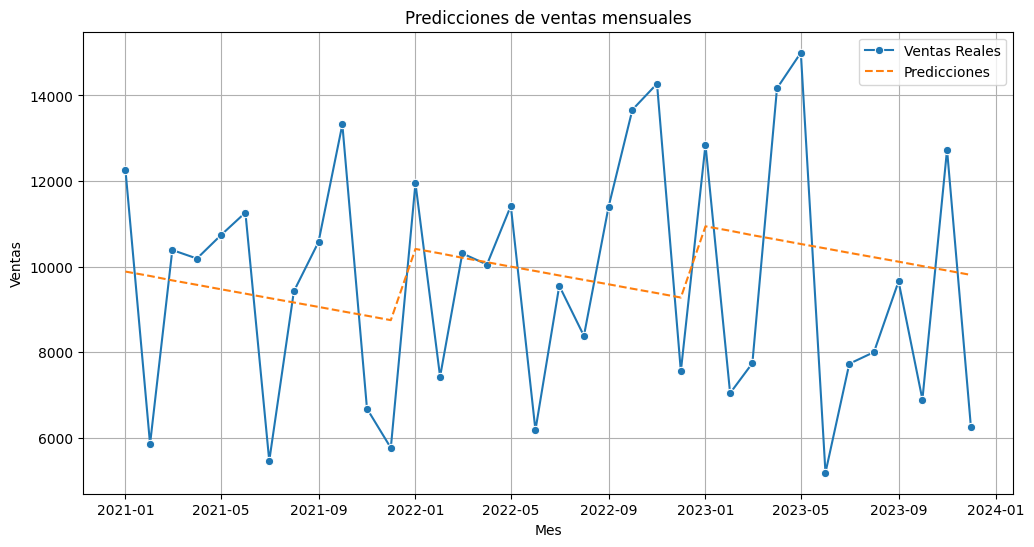

In [ ]:
# RESOLUCION COMPLETA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import seaborn as sns
#generar los datos ficticios de las ventas mensuales
np.random.seed(42) #establecer datos aleatorios sean fijos
fechas = pd.date_range(start='2021-01-01', end='2023-12-01', freq='MS')
ventas = np.random.randint(5000, 15000, size=len(fechas))
#crear el dataframe
data = pd.DataFrame({'Fecha': fechas, 'Ventas': ventas})
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
#declarar las variables
X = data[['Año', 'Mes']]
y = data['Ventas']
#dividir el conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #0.2: 20% de prueba
#crear y entrenar el modelo
model = lm.LinearRegression()
model.fit(X_train, y_train)
#realizar predicciones
y_pred = model.predict(X_test)
#prediccion para los meses evaluados
data['Prediccion'] = model.predict(X)
#calcular el error cuadratico
evaluar = mean_squared_error(y_test, y_pred)
print('Error cuadratico medio:', evaluar)
#graficar las ventas reales y predicciones
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Fecha'], y=data['Ventas'], label='Ventas Reales', marker='o')
sns.lineplot(x=data['Fecha'], y=data['Prediccion'], label='Predicciones', linestyle='--')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Predicciones de ventas mensuales')
plt.legend()
plt.grid(True)
plt.show()




Ejercicio 2: Análisis de Abandono de Clientes en una Empresa de Telecomunicaciones
Descripción: Analiza la probabilidad de que los clientes abandonen la empresa usando un conjunto de datos de características de clientes (duración de contrato, tipo de plan, entre otros).

- Carga el CSV con los datos de clientes.
- Realiza un análisis exploratorio y visualiza patrones.
- Crea un modelo de clasificación binaria (por ejemplo, Random Forest) para predecir si un cliente abandonará o no.
- Evalúa el rendimiento con métricas como F1-score y realiza una predicción sobre una muestra nueva.

<ipython-input-35-1f8f74b3b046>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2021-01-01', end='2023-12-01', freq='M')


Error cuadratico medio: 6471.133846900431


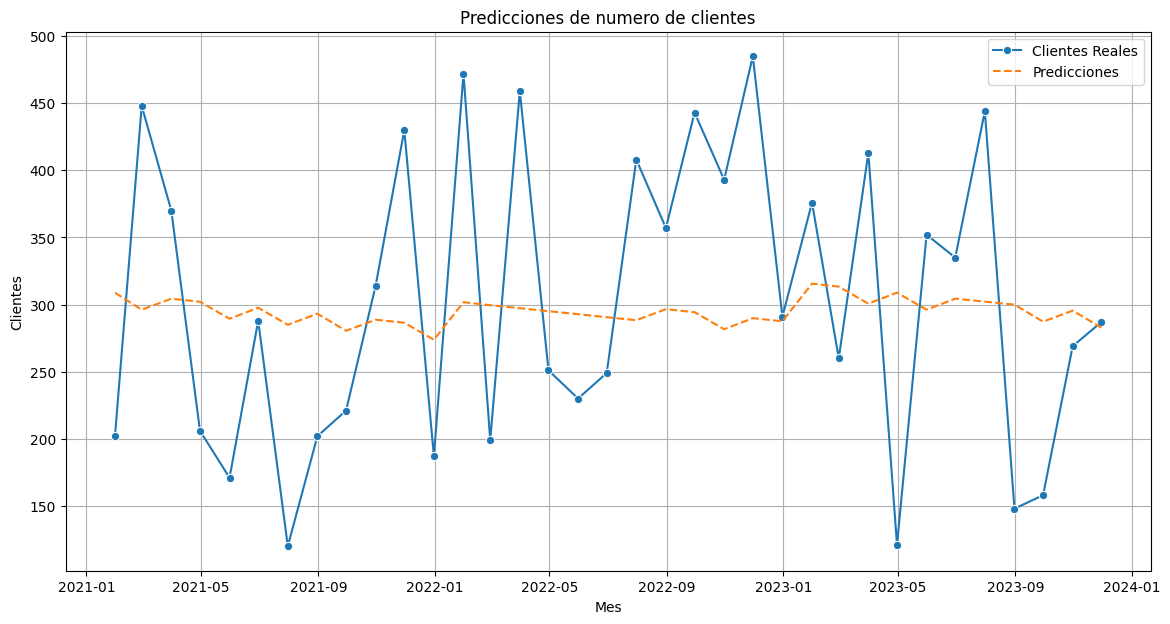

In [ ]:
#F1 = 2 x (PRECISION x RECALL)
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
#generar los datos ficticios para el numero de clientes y promociones
np.random.seed(42)
fechas = pd.date_range(start='2021-01-01', end='2023-12-01', freq='M')
clientes = np.random.randint(100, 500, len(fechas)) #clientes que visitan tienda
promociones = np.random.randint(0, 2, len(fechas)) #1: promocion y 0: no promocion
#crear el dataframe con las fechas, clientes y promociones
data = pd.DataFrame({'Fecha': fechas, 'Clientes': clientes, 'Promocion': promociones})
#extraer el mes y el año como caracteristicas adicionales
data['Mes'] = data['Fecha'].dt.month
data['Año'] = data['Fecha'].dt.year
#declarar las variables
X = data[['Mes', 'Año', 'Promocion']]
y = data['Clientes']
#dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#crear y entrenar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)
#realizar predicciones
y_pred = model.predict(X_test)
#calcular el error cuadratico
evaluar = mean_squared_error(y_test, y_pred)
print('Error cuadratico medio:', evaluar)
#generamos las predicciones para todos meses evaluados
data['Prediccion'] = model.predict(X)
#graficar el numero de clientes reales y las predicciones
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['Fecha'], y=data['Clientes'], label='Clientes Reales', marker='o')
sns.lineplot(x=data['Fecha'], y=data['Prediccion'], label='Predicciones', linestyle='--')
plt.title('Predicciones de numero de clientes')
plt.xlabel('Mes')
plt.ylabel('Clientes')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio 3: Predicción de Inventario de Productos para una Empresa Minorista
Descripción: Predice las necesidades de inventario de productos para el próximo mes, en función de los patrones de ventas anteriores.

- Carga el CSV que contiene datos de inventario y ventas mensuales de productos.
- Analiza la relación entre ventas e inventario y visualiza patrones.
- Crea un modelo de series temporales con ARIMA para predecir las necesidades de inventario.
- Genera recomendaciones de compra de productos basadas en las predicciones.

Tamaño del conjunto de entrenamiento: 120
Tamaño del conjunto de prueba: 30
Precision del modelo: 1.00


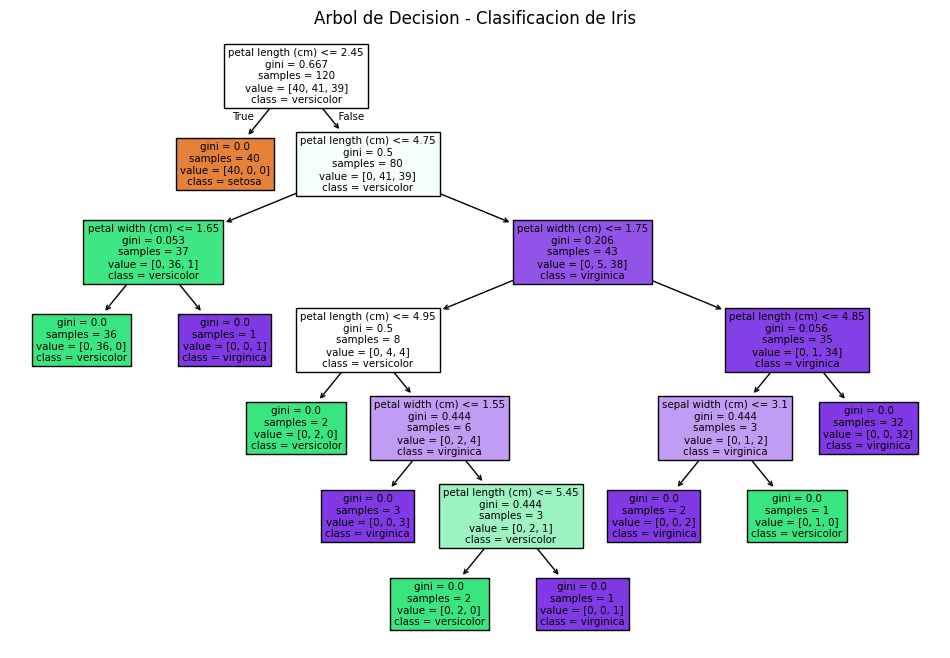

In [ ]:
#ARBOL DE DECISION PARA CLASIFICACION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#cargar los datos de load_iris
iris = load_iris()
#X,y = iris.data, iris.target
X = iris.data #caracteristicas
y = iris.target #etiquetas
#crear una dataFrame para una mejor visualizacion
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
#dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')
#crear y entrenar el modelo de arbol de decision
clasif = DecisionTreeClassifier(random_state=42)
clasif.fit(X_train, y_train)
#evaluar el modelo
accuracy = clasif.score(X_test, y_test)
print(f'Precision del modelo: {accuracy:.2f}')
#visualizar el arbol de decisiones
plt.figure(figsize=(12, 8))
plot_tree(clasif, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Arbol de Decision - Clasificacion de Iris')
plt.show()



In [ ]:
#ARBOL DE DECISION POR REGRESION
#cargar las librerias
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#cargar el conjunto de datos de Boston
boston = load_boston()
X = boston.data #caracteristicas
y = boston.target #etiquetas
#crear un dataframe para una mejor visualizacion
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=boston['feature_names'] + ['target'])
#dividir los datos en conjunto de entrenamiento y prueba
print(df.hed())




Ejercicio 4: Predicción de Ingresos en una Empresa de Publicidad en Línea
Descripción: Utiliza datos históricos de campañas publicitarias para predecir los ingresos futuros de la empresa según el rendimiento pasado de las campañas.

- Carga el CSV con detalles de campañas y sus ingresos.
- Realiza la limpieza y transformación de datos, y visualiza patrones de rendimiento.
- Crea un modelo de regresión con técnicas como el Gradiente Boosting para predecir ingresos.
- Evalúa la precisión del modelo y realiza una predicción para la siguiente campaña.

Ejercicio 5: Clasificación de Reclamaciones en una Compañía de Seguros
Descripción: Clasifica las reclamaciones de seguros en diferentes categorías (fraude, accidente, otros) para priorizar su revisión.

- Carga un CSV con el historial de reclamaciones y etiquetas de clasificación.
- Preprocesa los datos y analiza los patrones en las reclamaciones.
- Crea un modelo de clasificación multiclase (por ejemplo, SVM) para clasificar nuevas reclamaciones.
- Realiza predicciones en reclamaciones nuevas y evalúa la precisión con matrices de confusión.

In [1]:
import unittest

# Función que no permite números negativos
def suma(a, b):
    if a < 0 or b < 0:
        raise ValueError("No se permiten números negativos")
    return a + b

# Pruebas unitarias
class TestSuma(unittest.TestCase):
    def test_suma_valida(self):
        self.assertEqual(suma(2, 3), 5)  # 2 + 3 = 5
        self.assertEqual(suma(0, 5), 5)  # 0 + 5 = 5

    def test_suma_negativos(self):
        with self.assertRaises(ValueError):
            suma(-1, 2)  # Debe lanzar ValueError
        with self.assertRaises(ValueError):
            suma(3, -4)  # Debe lanzar ValueError
        with self.assertRaises(ValueError):
            suma(-2, -2)  # Debe lanzar ValueError

# Ejecutar pruebas en Google Colab
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK
